<a id='menu'></a>
<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1.0"> 

 ![logos](../images/la_dsc_logo.jpg)
 
 <hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1.0"> 

# Data Visualisation in Python

## Chapter 2 –  Plotting Overview
### Hannah Hodge Waller

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.25"> 

Follow along with the code by running cells as you encounter them

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.25"> 

*Chapter Overview*
1. [Packages and Data](#packages_data)
<br><br>
2. [Basic Plotting with a Scatter Plot](#basics)
<br><br>
    2.1.[Creating a Plot](#creating_plot)
<br>
    2.2.[Adding Data](#adding_data)
<br>
    2.3. [Basic Titles and Labels](#basic_titles)
<br><br>
3.	[Customising Plots to GSS Guidelines](#customising)
<br>
    3.1. [Fonts](#fonts)
    <br>
    3.2. [Colours](#colours)
    <br>
    3.3. [Gridlines](#gridlines)  
    3.4. [Axes and Ticks](#ticks) <br>
    3.5. [Titles and Subtitles](#titles) <br>
    3.6. [Footnotes and Captions](#footnotes) <br> 
    3.7. [Legends](#legends)
    <br><br>
    
4. [Globally Setting Paramaters](#global)
<br><br>
5.	[Saving Visualisations](#saving)
<br><br>
6. [Other Ways to Visualise](#other)
<br><br>
7. [Multiple Plots](#multiple)
<br>
    7.1. [Matplotlib](#multiple_mp) 
    <br>
    7.2. [Seaborn](#multiple_seaborn)
    <br>
    7.3. [Multiple Axes – Matplotlib](#multiple_ax_mp)  
    7.4. [Multiple Axes Programmatically – Matplotlib](#multiple_ax_mp_programatically) <br>
    7.5. [Multiple Axes - Seaborn](#multiple_ax_seaborn)
    

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1"> 

<a id='packages_data'></a>
# 1. Packages and Data

Let’s start, as always by loading our packages and our data.

We’re using:

* Numpy – Version 1.12.1 
* Pandas – Version 0.20.1 
* Matplotlib – Version 2.0.2  (here as the `pyplot` module)
* Seaborn - Version 0.7.1

Remember you can use the `.__version__` attribute (e.g `np.__version__` )to check your version.

More information about the packages is given in Chapter 1.

We're following standard convention for nicknames, and we’ll also load the gapminder data.

In [3]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load data
gapminder = pd.read_csv("../data/gapminder.csv")

We’ll also use the magic command

`% matplotlib inline`

This means any plot we create will be automatically embedded below the code cell once the code has been executed.

In [4]:
%matplotlib inline

As a reminder visualisation code can get lengthy quickly.

A lot of these visualisations will only have **one or two new concepts**, the other code will be things covered previously.
To make the code clearer we will be using lots of comments. In Python these look like this:

``` python
# This is a comment
```

As we get into more complicated visualisations ** new ** concepts will have the word **NEW - ** at the start of the comment e.g:

``` python
#  NEW - Set X Axis
```

We will also refer to line numbers to describe content.

You can turn on line numbers in the View Menu -> Toggle Line Numbers


[return to menu](#menu)

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1"> 

<a id='basics'></a>
# 2. Basic Plotting with a Scatter Plot

In this section we’ll explore creating a basic plot using pyplot. We'll do this with just one kind of plot - the scatter plot. We'll look at other plots in later chapters, but get a good foundation building on one plot to start off with.

By the end of this section we'll have built our scatter plot to meet GSS standards and have a good core understanding of how the plotting tools in Matplotlib work.

There are a variety of ways to create plots within Matplotlib, and even within the Pandas package.

The way we’ll demonstrate is not necessarily the “simplest” way to plot; however it provides us with strong foundations when we wish to create more advanced or customised plots later on.


We have several types of object within Matplotlib:

### The `Figure` Object

The outermost container for a plot. This contains a minimum of one `axes` object – but can contain multiples `axes` objects. 
The `figure` object contains and manages other objects associated with plots, like titles and legends.

### The `Axes` object

Effectively the main plot itself. This is made up of many objects which are used to define what’s represented in the plot.
There are many `axes` methods we can use to create different plots and we can use our `axes` object to set things like axis labels, ticks and ranges.

## Other objects

There are other objects, such as locator objects, formatter objects and artist objects. Most of the time we can do everything we need through an axes object though.

Matplotlib graphs our data on `Figure` objects, each of which contains one or more `Axes` object.

![one figure can contain a single axes, or multiple axes, such as a two by two array of axes](../images/chapter_3_plotting_overview/figs_and_axes_demo.png)

For most of this course we’ll concentrate on one `figure` and one `axes` object; but will explore multiple plots briefly at the end of this section.

[return to menu](#menu)

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

<a id = "creating_plot"></a>
## 2.1. Creating a Plot  

To create our figure and axes we use the code:

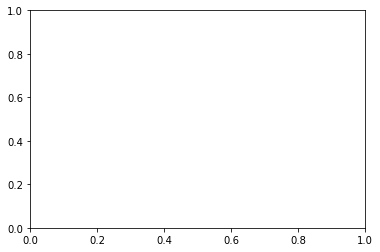

In [5]:
# Create our figure and our axes

figure, axes = plt.subplots()

As you can see this creates the `figure` object , which contains our single `axes` object.

We can customise the size of this plot by specifying the `figsize` parameter.

This takes a tuple – (width, height) and is measured in inches. The default is (6.4, 4.8).

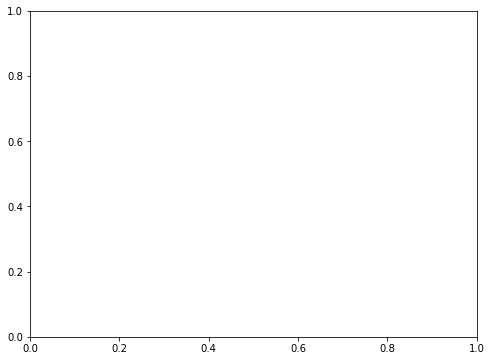

In [6]:
# Create our figure and our axes

figure, axes = plt.subplots(figsize=(8, 6)) # NEW - Set figure size

[return to menu](#menu)

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

<a id = "adding_data"></a>
## 2.2. Adding Data  

Let’s plot the infant mortality against GDP for 1987. 

First I’ll make a new DataFrame with just the data for 1987, and reset the index.

I’ll call this `gm_1987`.

As a reminder basic data manipulation is not explained in this course, but can be found in the Introduction to Python course.

In [8]:
# Create a new Dataset for 1987 and reset the index.

gm_1987 = gapminder[gapminder["year"] == 1987]
gm_1987.reset_index(drop = True, inplace = True)

We always start our plots by creating the `figure` and `axes` objects.

We can then create the contents of our plot using a method from the `axes` object.

To create a scatter plot we use `axes.plot()`

Here we’re passing two arguments, effectively:

`axes.plot(x, y)`


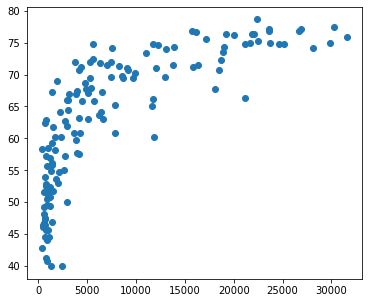

In [9]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# NEW - Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"])

A semi colon ( ; ) at the end of the last line supresses the output line – here `<matplotlib.collections.PathCollection at 0x1c343226d30>` which we often do not want with our visualisation.

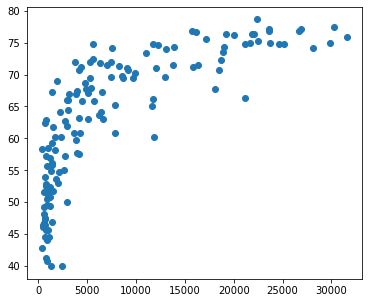

In [10]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"]); # NEW - added ; to end of line

### Exercise 1:

Filter the Gapminder data for the United Kingdom

Make a scatter plot with:

gdp_percap as x axis

fertility as y axis

In [ ]:
# Exercise





In [ ]:
# Solution - These cells contain answers for the exercises.
#Run once to reveal the code.
#Run again to reveal the output. 

%load ../solutions/plotting_overview/exercise1.py

[return to menu](#menu)

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

<a id = "basic_titles"></a>

## 2.3 Basic Titles and Labels

We can set our titles and labels from the `axes` object.

These come under the `.set_ ` family of methods – and should be fairly self-explanatory.

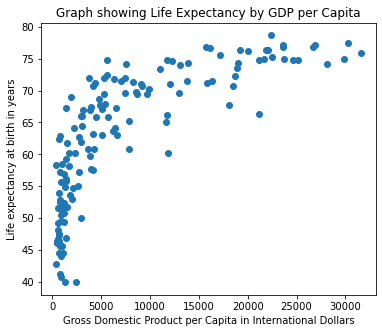

In [11]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"])

# NEW - Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita")
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars")
axes.set_ylabel("Life expectancy at birth in years");

### Exercise 2:

Use the visualisation you created in the previous exercise, and set an appropriate Title, and X and Y axis Labels.

In [ ]:
# Exercise





In [ ]:
# Solution - These cells contain answers for the exercises.
#Run once to reveal the code.
#Run again to reveal the output. 

%load ../solutions/plotting_overview/exercise2.py

[return to menu](#menu)

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1"> 

<a id='customising'></a>
# 3. Cutomising Plots to GSS Guidelines

Often the default behaviour of plotting packages will not create outputs that meet our style guides or specifications.


As mentioned previously we’re following the guidance set out by [Style.ONS]( https://style.ons.gov.uk/category/data-visualisation/chart-design/) and the [GSS Good Practice Team. ]( https://gss.civilservice.gov.uk/policy-store/introduction-to-data-visualisation/ )

If your department has different guidance you should follow those. 


[return to menu](#menu)

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

<a id = "fonts"></a>
## 3.1. Fonts  

In this section we'll talk about fonts in Matplotlib. 

We'll address these individually in this section; we can also set them globally to save time. We'll talk about that later in this chapter.

Guidance recommends using a single accessible sans serif font. Examples of these fonts are Arial and Tahoma.

We can alter the font individually in the labels and title by using the parameter `font` and supplying a font name in speech marks.

In the cell below I have set the title to be “Arial” in line 9.


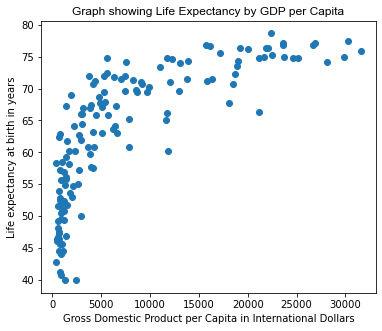

In [12]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"])

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial") # NEW - Change title font
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars")
axes.set_ylabel("Life expectancy at birth in years");

If a font does not exist then we get the user warning that the font is not found.

It will then fall back to the default font – on my system “DejaVu Sans”.

findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


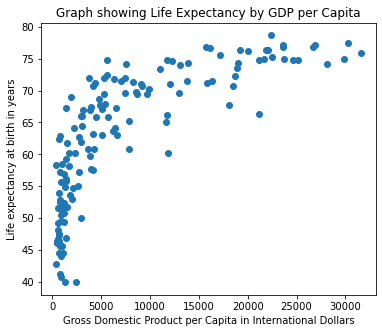

In [13]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"])

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Open Sans") # NEW - Change title font
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars")
axes.set_ylabel("Life expectancy at birth in years");

<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

### Setting Font Sizes

We can set font sizes individually from within the `set_` methods.

We use the parameter `size` and pass an integer. Here 16 for our title and 12 for our x and y labels.

Note this does not alter the font size for the numbers on either axis.

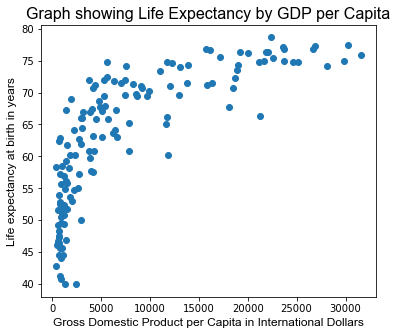

In [14]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"])

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", 
               size=16) # NEW - Set font size
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", 
                fontname="Arial", size=12) # NEW - Set font name as before, and size
axes.set_ylabel("Life expectancy at birth in years", 
                fontname="Arial", size=12); # NEW - Set font name as before, and size

<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

### Changing other text attributes

We can find out parameters we can set to text using the help function - `?matplotlib.text.Text`

In [15]:
# Previously matplotlib.pyplot was imported as plt, to see the help from matplotlib 
# the base level of the package needs to be imported. Generally it's not a good idea 
# to import packages halfway through a notbeook!
import matplotlib 
?matplotlib.text.Text

You’ll notice that we can set a huge variety of options; from the sensible (bolding) through to the bizarre, like adding a background colour for our title.

Here we’re introduced to one of the really important elements of visualisation journey:

> With great power comes great responsibility -  Uncle Ben (Spiderman)

You should always think, does this add to my visualisation or detract from it?

Here I’ve picked out a few parameters you may find useful and applied them to the title in lines 9 to 14.

Note - this should not be considered best practice; it's just to highlight a few parameters.

Guidance says that bold fonts should be limited to headings and italics should not be used at all.


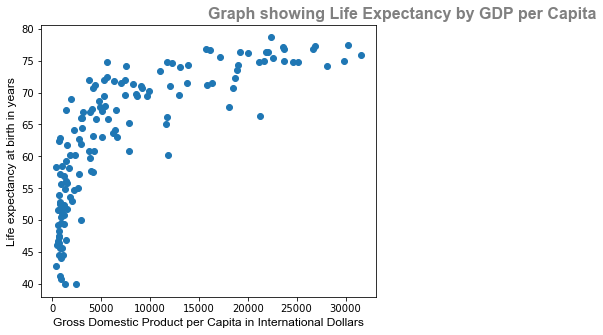

In [16]:
# REMINDER - Not best practice here!
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"])

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita",
               weight="bold",
              color="gray",
              size=16,
              horizontalalignment="left", 
              fontname="Arial") # NEW - Altered parameters

axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12);

### Exercise 3:

Using the visualisation you created in the previous exercise:

Set the font to be Arial for the title, x and y axis labels. 

Set the title to be 16 and the x and y axis labels to be 14.

In [ ]:
# Exercise





In [ ]:
# Solution - These cells contain answers for the exercises.
#Run once to reveal the code.
#Run again to reveal the output. 

%load ../solutions/plotting_overview/exercise3.py

[return to menu](#menu)

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

<a id = "colours"></a>
## 3.2. Colours  

Colour is a fundamental part of our visualisations. Used poorly, it can confuse the user – used well it can enhance and clarify statistical content.

> “Avoiding catastrophe becomes the first principle in bringing colour to information. Above all, do no harm.” - Edward Tufte

The resources linked below go into much greater detail about colour theory, and tips about using colours and make for very interesting reading.


Matplotlib has a huge variety of ways to specify colour. Here we’ll specify just a few, but you can find additional ways to specify colours on the [tutorial]( https://matplotlib.org/3.2.1/tutorials/colors/colors.html) on the Matplotlib website.

> ## N.B – The explanatory text will spell colo*u*r with the UK spelling.
> ## Matplotlib uses the American spelling for the parameter: `color `

This section is quite long and has been split into the following categories:

* [Colour by Names](#colour_names)

* [Colour by HTML Names and Hex Codes](#colour_html)

* [Colour by Greyscale](#colour_grey)

* [Colour by RGB and RGBA values](#colour_rgb)

* [Setting Alpha](#colour_alpha)

* [Colouring points using data - continuous](#colour_continuous)

* [Colouring points using data - categorical](#colour_categorical)


<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

<a id = "colour_names"></a>

### Colour by Names


We apply our colours to our scatter plot. In line 6 I’ve used the colour name as a string:
    
``` python 
color="blue" 
```
This turns the points on my scatter plot to blue.

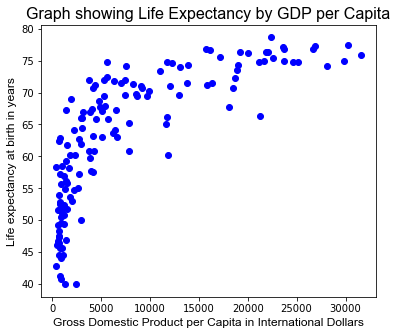

In [17]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
            color="blue")  # NEW - Colour specified using a colour name.

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", size=16)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12);

<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

<a id = "colour_html"></a>

### Colour by HTML Names and HEX codes


Matplotlib will accept most common names, and [HTML colour names]( https://www.w3schools.com/colors/colors_names.asp) - here I'm using `color="OliveDrab"`

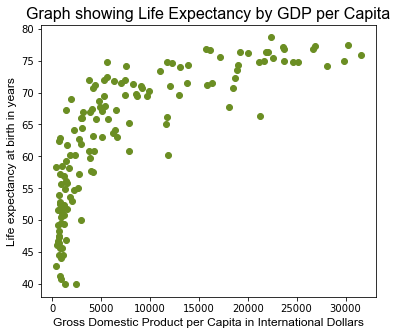

In [18]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
            color="OliveDrab")  # NEW - Colour specified using HTML colour names

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", 
               size=16)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12);

For finer control we can also use hex codes; these are given as a string with a # symbol at the front.

Here "#9E2A2B" is a burnt red colour.

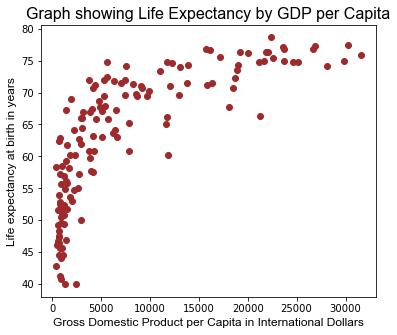

In [19]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
            color="#9E2A2B")  # NEW - Colour specified using HEX code

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", 
               size=16)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12);

<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

<a id = "colour_grey"></a>

### Colour by Greyscale


For greyscale we can also use a decimal between 0.0 (white) and 1.0 (black) to select a grey colour.

Note this needs to be a string.


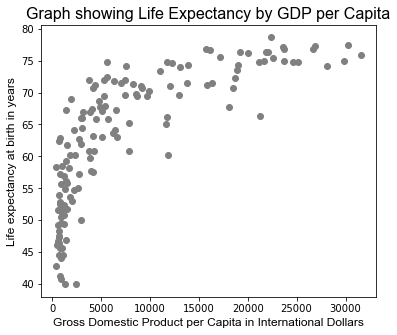

In [17]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6,5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
            color="0.5")  # NEW - Grey colour as a float

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", size=16)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12);

<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

<a id = "colour_rgb"></a>

### Colour by RGB and RGBA values

We can also set colours by the RGB value. This is the **R**ed, **G**reen and **B**lue value.

This is on a scale of 0 to 255 for each value, and Matplotlib accepts them as a tuple of float (decimal) values.

ONS Blue has the RGB Value  0, 61, 89.

Focusing on the Green value to convert it to a decimal we need to do `61/255 = 0.23921568627450981`

So we can say our decimal values for ONS Blue should be (0 , 0.239 , 0.349 )

Here I've chosen values to the precision of the 3rd digit, differences beyond that should be not visible to the human eye.

This also works for RGBA colours; **R**ed, **G**reen, **B**lue, **A**lpha (transparency). The Alpha is between 0 (transparent) and 1 (solid)

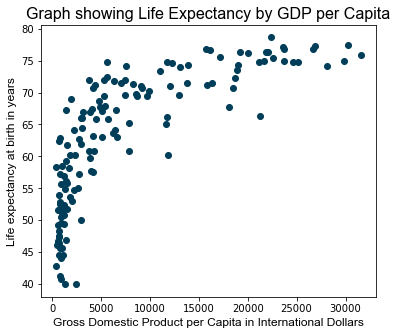

In [18]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
            color=(0, 0.239, 0.349))  # NEW - Colour specified using RGB Values

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", size=16)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12);

Just to further demonstrate the difference between a correct and an incorrect RGB value – see the visualisations below. The left uses the incorrect assumption that the RGB values can be directly coded to decimals, and the right uses the properly converted methods. More detail will be gone into later about how exactly two side by side plots have been created.

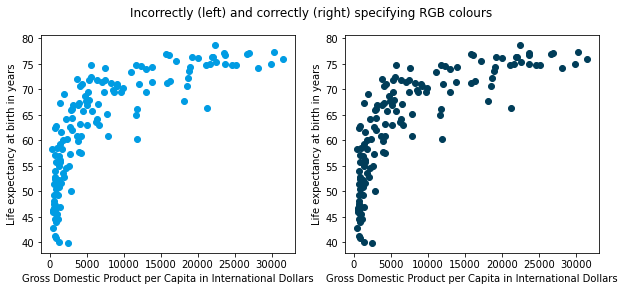

In [19]:
# Create our figure and our axes
figure, (axes1, axes2) = plt.subplots(1, 2, figsize=(10, 4))

# The line below allows us to create a title for both charts
figure.suptitle("Incorrectly (left) and correctly (right) specifying RGB colours") 

# Plot 1
axes1.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
             color=(0, 0.61, 0.89))
axes1.set_xlabel("Gross Domestic Product per Capita in International Dollars")
axes1.set_ylabel("Life expectancy at birth in years")

# Plot 2
axes2.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"], 
              color=(0, 0.239, 0.349))
axes2.set_xlabel("Gross Domestic Product per Capita in International Dollars")
axes2.set_ylabel("Life expectancy at birth in years");


<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

<a id = "colour_alpha"></a>

### Setting Alpha

We can use the `alpha` parameter to control the transparency of our points. This is a float value between 0 and 1; where 0 is fully transparent (invisible) and 1 is completely solid.

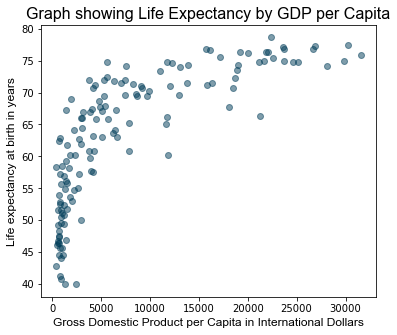

In [20]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
             color=(0.0, 0.239, 0.349),
             alpha=0.5)  # NEW - Alpha controlling transparency.


# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname= "Arial", size = 16)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12);

### Exercise 4:

Using the visualisation you created in the previous exercise:

Set the colour of the points to ONS Green – Hex #a5cd46 or an RGB value of (165,205,70). Set the alpha to be 0.9. 


In [ ]:
# Exercise





In [ ]:
# Solution - These cells contain answers for the exercises.
#Run once to reveal the code.
#Run again to reveal the output. 

%load ../solutions/plotting_overview/exercise4.py

<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

<a id = "colour_continuous"></a>

### Colouring points using data - continuous

We may sometimes want to colour points on our scatter plots based on a category or other data.

This isn’t terribly straight forward in Matplotlib; and is often a reason people choose to use Seaborn, or Plot9 packages for this kind of visualisation.

In our `ax.scatter()` call we can use the parameters:

* `c` and pass a column.  Note this is a **different** parameter than color!

* `cmap` takes a colormap name. You can find a list of the colormap names [here]( https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html). 

You can find guidance on making your own colormaps [here](https://matplotlib.org/3.2.1/tutorials/colors/colormap-manipulation.html)

ONS and GSS Guidance for colourmaps mentions that many visualisations are still printed in greyscale to save ink. Choosing a single colour palette can help with this. Blues is a commonly used palette across government figures.


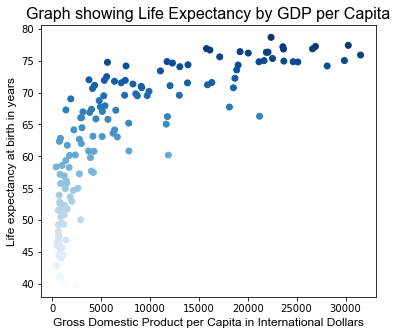

In [21]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
             c=gm_1987["life_exp"], # NEW - Colour by column
             cmap="Blues")  # NEW - Select the Blues colormap

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", size=16)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12);

We can add an attribute known as a `colorbar` here to demonstrate the scale of our colours.

This won’t work unless we assign our plot to a variable – the color bar is called from the `figure` object.

Note that in the code below that my scatterplot is assigned to the variable `plot`.

There are a lot of parameters we're covering here. You may want to make a copy of this cell and observe what happens when you remove certain arguments.

** `cbar = figure.colorbar()` **

The `colorbar()` method is called from the `figure` object. Note I’ve assigned it to the variable `cbar` here – this allows us to set labels easier.

* `mappable` refers to the object we’re applying the colorbar too; here `plot`.

* `ax` is the axes we’re applying this too, ours is called `axes`

* `ticks` takes a list of custom tick values for our colorbar. I’ve set these up at the top of the plot using `np.arrange()` - that code could be applied directly to the argument; but it’s easier to read when assigned to a variable in my opinion.

* `extend` allows us to have pointed ends of our bars. As life expectancy could be less than or exceed our range I’ve set this to `both`.

** `cbar.ax.get_yaxis.labelpad()` **

This code is adding a little padding to our label – without this it sits over our ticks.

** `cbar.set_label()  ` **

* `label` is our label

* `rotation` moves the label. I feel it is more readable in this direction.


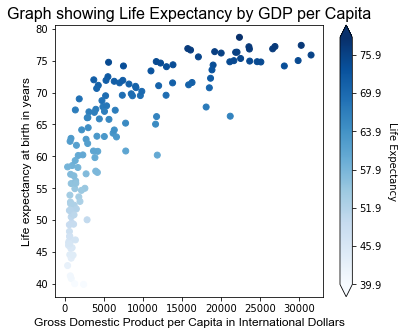

In [22]:
# NEW - Set up some custom ticks for the colorbar
custom_ticks = np.arange(gm_1987["life_exp"].min(), (gm_1987["life_exp"].max()+1), step=6)

# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data - NEW - I've assigned the visualisation to the variable plot
plot = axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
                    c=gm_1987["life_exp"], cmap="Blues")

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", size=16)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)


# NEW - Add the Colorbar
cbar = figure.colorbar(mappable=plot, ax=axes, ticks=custom_ticks, extend="both")

# NEW - Put a bit more space between the colorbar y axis and the label
cbar.ax.get_yaxis().labelpad = 15

# NEW -Set the label of the colorbar and rotate it.
cbar.set_label(label="Life Expectancy", rotation=270)

<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

<a id = "colour_categorical"></a>

### Colouring points using data - categorical


This above method is great if we wish to colour by a sequential numerical column. However, what if we want to colour by a categorical (or factor) variable like continent?

Packages like Seaborn, and others like Plot9 (a copy of R's GGplot2 package) make this step easy. We’ll cover the Seaborn method in chapter 6, which is dedicated to that package.

Matplotlib makes it a bit fiddlier; but not impossible. A massive thank you here to Jonathon Mellor for helping with the very fiddly bits. This section may not look long; but had us both scratching our heads for a while.

Passing a string column or a categorical column to the `c` argument doesn't work. There are ways around this by mapping each category to a numerical value and then plotting those; adjusting the colorbar to represent static values and re-labelling; but they're complicated, time consuming and not particularly readable.

Instead we can use the `unique().tolist()` method to give us a list of the unique values in our continent column. 

I’ve also sorted this column so our values are in alphabetical order. 

We can then use this to loop through and plot data for each continent. So on the first iteration the loop will plot all the data points for Asia, on the second Africa etc.

The parameter `label` and then our looping variable will allow us to have a labelled legend at the end; vital for knowing which colour is which continent.

We display the legend by using `plt.legend()` - we'll look at more customisation of legends later.

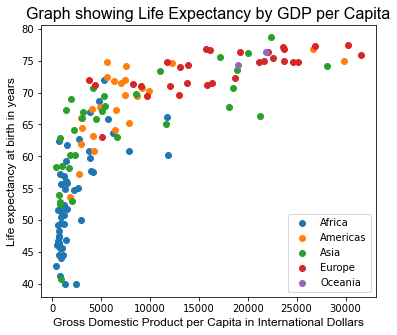

In [23]:
# NEW - Set Up
continents = gm_1987["continent"].unique().tolist() # Get a list with the unique values of the continent column.
continents.sort() # Sorting this list to alphabetical order

# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# NEW - Loop through each continent in turn
for continent_name in continents:
    # NEW - Get the subset of our data corresponding to the continent specified.
    continent_rows = gm_1987[gm_1987["continent"] == continent_name] 
    
    axes.scatter(x=continent_rows["gdp_per_cap"], 
                 y=continent_rows["life_exp"],
                 label=continent_name) # NEW -  Gives each continent a label for our legend

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", size=16)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# NEW - Show the Legend
plt.legend(); 

This uses an automatically generated palette; but we can adapt this loop to set our own colour palette.

Here I’ve created a list with my colour palette in hex codes. I generated this using the [“Coolors” website]( https://coolors.co/335c67-f5d000-e09f3e-9e2a2b-540b0e).

The variable `my_palette` contains a list of the colours I wish to loop through. This list has the same number of elements as my continents list; but it still works if it’s longer.

I’m using the `zip()` function to make an [iterable from the lists]( https://docs.python.org/3.3/library/functions.html#zip). I can then use this in my loop. 


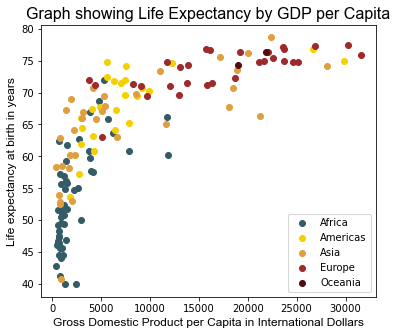

In [24]:
# Set Up
continents = gm_1987["continent"].unique().tolist() # Create a list with each unique value in continent column
continents.sort() # Sort this list in alphabetical order
my_palette = ["#335C67" ,"#F5D000", "#E09F3E", "#9E2A2B", "#540B0E"] # NEW - Create a list of colours desired

# NEW - zips together our continent names and palette colours into one list of tuples
continent_palette = zip(continents, my_palette) 

# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Loop through each continent and each colour in turn
for continent_name, colour in continent_palette:
    # Get only the data for the continent we are looking at
    continent_rows = gm_1987[gm_1987["continent"] == continent_name]
    
    axes.scatter(x=continent_rows["gdp_per_cap"], 
                 y=continent_rows["life_exp"],
                 c=colour, # NEW - Use corresponding colour from continent_palette
                 label=continent_name) # Gives each continent a label for our legend

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", size=16)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

plt.legend(); # Show the Legend


This technique could be expanded upon by giving each continent a different marker, and many of the other things we can customise in a scatter plot. We’ll revisit this plot later in the course for specific details.

We can also use a qualitative cmap here too; this is done through the `axes.set_prop_cycle()` method. Here I've used "Paired" as my cmap.


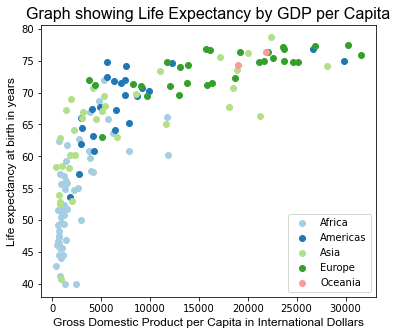

In [25]:
# Set Up
continents = gm_1987["continent"].unique().tolist() # create a list with each unique value in continent column
continents.sort() # Sort this list in alphabetical order

# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# NEW - Set our colour cycle (N.B needs to be a qualitative cmap)
axes.set_prop_cycle(plt.cycler("color", plt.cm.Paired.colors))  

# Iterate only over the names we want to plot (instead of a combined color object)
for continent_name in continents:
    
    continent_rows = gm_1987[gm_1987["continent"] == continent_name] # get only the data for the continent we are looking at
    
    axes.scatter(x=continent_rows["gdp_per_cap"], 
                 y=continent_rows["life_exp"],
                 label=continent_name)

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", size=16)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

plt.legend(); # Show the Legend

[return to menu](#menu)

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

<a id = "gridlines"></a>
## 3.3. Gridlines  

ONS Standardised gridline colour is RGB value 190, 190, 190. 

In the decimals Matplotlib needs that's about (0.745, 0.745, 0.745). Check the section above for how we calculate this. This is also the hexadecimal  code #BEBEBE for convenience.

We use the `.grid()` method from the axes.

* `b` stands for Boolean, and controls if the gridlines are turned on - `True`, or off - `False`. The default behaviour is `False`.

* `which` controls which gridlines are turned on - this can be set to `major`, `minor` or `both`.

We can also add in additional key word arguments to control things like colour - here set to ONS' standard value.

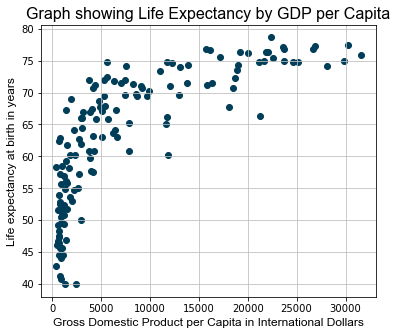

In [26]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
            color=(0.0, 0.239, 0.349))  # Colour specified using RGB Values

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", size=16)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# NEW - Set the Gridlines
axes.grid(b=True , which="major", color=(0.745, 0.745, 0.745));

The default behaviour is for the grid lines to appear in front of the data points.

We can change this by using the method:

`axes.set_axisbelow(True)`

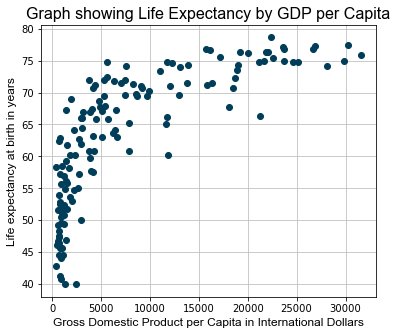

In [27]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
            color=(0.0, 0.239, 0.349))  # Colour specified using RGB Values

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", size=16)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Gridlines
axes.grid(b=True , which="major", color=(0.745, 0.745, 0.745))
axes.set_axisbelow(True); # NEW - Set gridlines behind data points

We can also use `axes.set_frame_on(False)` to remove the outer frame around our visualisation. 

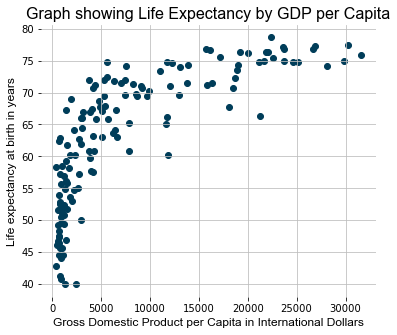

In [28]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
            color=(0.0, 0.239, 0.349))  # Colour specified using RGB Values

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", size=16)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set the Gridlines
axes.grid(b=True, which="major", color=(0.745, 0.745, 0.745))
axes.set_frame_on(False); # NEW - Removes the frame

We can also set just horizontal gridlines by using the method:
    
`axes.yaxis.grid(True)`

We can control other parameters as well here – such as colour.

Of course; if you wish to just display vertical gridlines `axes.xaxis.grid(True)` also exists.

We're also using `axes.set_axisbelow(True)` to place the points in front of the gridlines.

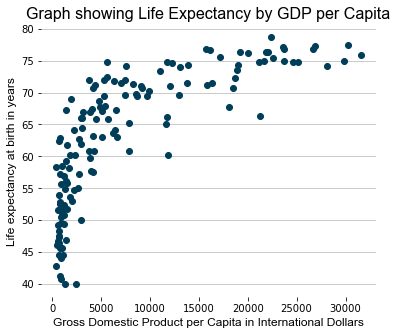

In [29]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
            color=(0.0, 0.239, 0.349))  # Colour specified using RGB Values

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", size=16)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Gridlines
axes.yaxis.grid(True, color=(0.745, 0.745, 0.745)) # NEW - set only the Y gridlines
axes.set_frame_on(False)
axes.set_axisbelow(True); 

For some visualisations when the `color` parameter in gridlines is set it overwrites and ignores that we’ve just set one axis of gridlines to display.
A hacky solution is to set one set of gridlines to white (our background colour) and one set to the GSS gridlines colour. This feels like a bug, and may not exist in your version of the packages; but you may see it set as below through the rest of the course.


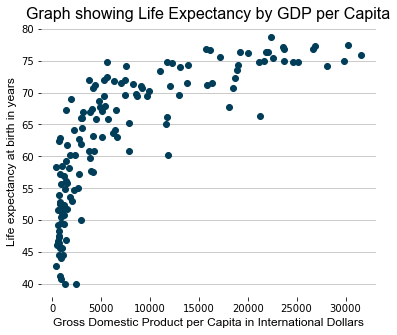

In [30]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
            color=(0.0, 0.239, 0.349))  # Colour specified using RGB Values

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", size=16)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Gridlines
axes.grid(b = True , which = "both", axis = "x", color = "white") # NEW - Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True); 

### Exercise 5:

Using the visualisation you created in the previous exercise:

* Set Gridlines using the RGB value 190, 190, 190 as above.

* Remove the outer frame.

* Ensure the data points are in front of the grid.

In [ ]:
# Exercise





In [ ]:
# Solution - These cells contain answers for the exercises.
#Run once to reveal the code.
#Run again to reveal the output. 

%load ../solutions/plotting_overview/exercise5.py

[return to menu](#menu)

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

<a id = "ticks"></a>
## 3.4. Axes and Ticks

### Axes

It’s important to note that Matplotlib is currently making the decision of the axis scale.

Compare the two visualisations below.

The left uses the automatically generated limits for axis, based on the range of our data. From a quick glance the correlations look different, deepening on where the axis starts.

The code used to create the visualsations is also below - we'll explain how to create multiple plots later.

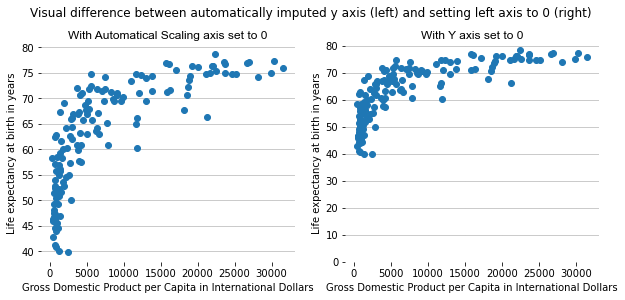

In [31]:
# Create our figure and our axes
figure, (axes1, axes2) = plt.subplots(1, 2, figsize=(10, 4))

# The line below allows us to create a title for both charts
figure.suptitle("Visual difference between automatically imputed y axis (left) and setting left axis to 0 (right)", y = 1.01) 

# Plot 1
axes1.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"])
axes1.set_xlabel("Gross Domestic Product per Capita in International Dollars")
axes1.set_ylabel("Life expectancy at birth in years")
axes1.set_title("With Automatical Scaling axis set to 0", fontname="Arial", size=12)
axes1.grid(b = True, which = "major", axis = "x", color = "white")
axes1.grid(b = True, which = "major", axis = "y", color = (0.745, 0.745, 0.745))
axes1.set_frame_on(False)
axes1.set_axisbelow(True)


# Plot 2
axes2.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"])
axes2.set_ylim(bottom=0)  # This code sets the y axis bottom value to 0.
axes2.set_xlabel("Gross Domestic Product per Capita in International Dollars")
axes2.set_ylabel("Life expectancy at birth in years")
axes2.set_title("With Y axis set to 0", fontname="Arial", size=12)
axes2.grid(b = True, which = "major", axis = "x", color = "white")
axes2.grid(b = True, which = "major", axis = "y", color = (0.745, 0.745, 0.745))
axes2.set_frame_on(False)
axes2.set_axisbelow(True);

We can set the y axis to 0 by using `axes.set_ylim()` method.

We set the value `bottom` to 0.

Guidance states that we should always aim to have our axis starting at 0 when possible.

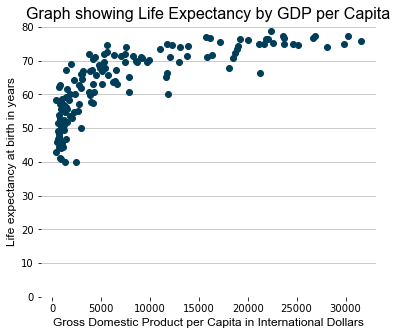

In [32]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
            color=(0, 0.239, 0.349))  # Colour specified using RGB Values

# NEW - Set the Y axis lower limit to 0
axes.set_ylim(bottom=0) 

# Add labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", size=16)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set gridlines and colours
axes.xaxis.grid(True, color="white")
axes.yaxis.grid(True, color=(0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True);

### Ticks

“Ticks” is the word Matplotlib uses to refer to the markers on our axes; so far we’ve been happy to use the default values for these, with the exception of resetting our y axes to 0.

However we may sometimes need to manipulate these to provide a better visualisation.

We can manually set our ticks using the `axes.set_xticks()` and `axes.set_yticks()` methods.

We pass a list or an array to this method. It's good to create these at the top of the visualisation and assign them to variables. You may want to adjust the steps later; and having them separate and easily identifiable makes this easier.

In lines 2 and 3 `numpy.arange()` is used to get an array between 0 and the maximum + 1 of my column. My step depends on which variable is being dealt with.

In lines 13 and 14 the `np.array` objects created are being passed to the `axes.set_` methods.

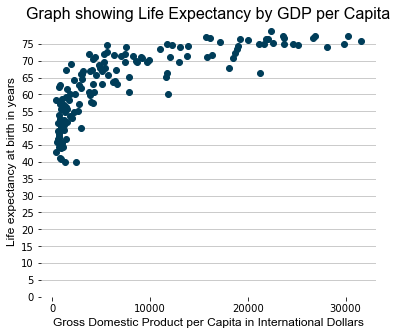

In [34]:
# NEW Create variables for the ticks.
my_xticks = np.arange(start=0, stop=(gm_1987["gdp_per_cap"].max() + 1), step=10000)  
my_yticks = np.arange(start=0, stop=(gm_1987["life_exp"].max() + 1), step=5) 

# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
            color=(0, 0.239, 0.349))  # Colour specified using RGB Values

# NEW Set the x and y ticks
axes.set_xticks(my_xticks)
axes.set_yticks(my_yticks)


# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", size=16)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True);

You can also manually set the tick labels. As an example, here Y axis ticks have been changed to be every twenty instead of every 5, while the X axis tick labels have been changed to be in thousands of International Dollars on line 17.

This technique will become more useful in different types of visualisation; but it is important to cover here briefly.

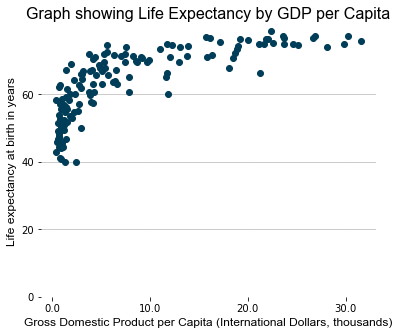

In [35]:
# Create variables for the ticks.
my_xticks = np.arange(start=0, stop=(gm_1987["gdp_per_cap"].max() + 1), step=10000)  
my_yticks = np.arange(start=0, stop=(gm_1987["life_exp"].max() + 1), step=20) 

# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
            color=(0 , 0.239, 0.349))  # Colour specified using RGB Values

# Set the x and y ticks
axes.set_xticks(my_xticks)
axes.set_yticks(my_yticks)

# NEW - Set the Y tick labels
axes.set_xticklabels(my_xticks / 1000)

# Add Labels and titles
# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", size=16)
axes.set_xlabel("Gross Domestic Product per Capita (International Dollars, thousands)", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True);

We can also change the colour of our ticks using the `.set_tick_params()` methods for both the X and Y axes. This helps them to not look so stark against the grid line colours.

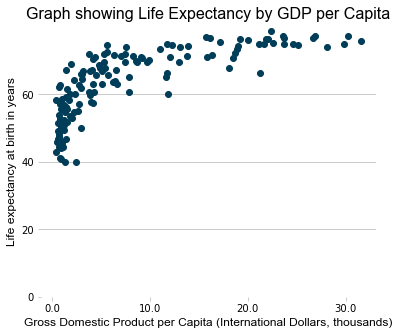

In [36]:
# Create variables for the ticks.
my_xticks = np.arange(start=0, stop=(gm_1987["gdp_per_cap"].max() + 1), step=10000)  
my_yticks = np.arange(start=0, stop=(gm_1987["life_exp"].max() + 1), step=20) 

# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
            color=(0 , 0.239, 0.349))  # Colour specified using RGB Values

# Set the x and y ticks
axes.set_xticks(my_xticks)
axes.set_yticks(my_yticks)

# Set the Y tick labels
axes.set_xticklabels(my_xticks / 1000)

# Add Labels and titles
axes.set_title("Graph showing Life Expectancy by GDP per Capita", 
               fontname="Arial", size=16)
axes.set_xlabel("Gross Domestic Product per Capita (International Dollars, thousands)", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# NEW Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745, 0.745, 0.745))
axes.yaxis.set_tick_params(color=(0.745, 0.745, 0.745))

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True);

### Exercise 6:
Using the visualisation you created in the previous exercise:

Set the Y axis to start from 0.

Set the colours of the tick labels to match the gridline colour.

In [ ]:
# Exercise





In [ ]:
# Solution - These cells contain answers for the exercises.
#Run once to reveal the code.
#Run again to reveal the output. 

%load ../solutions/plotting_overview/exercise6.py

[return to menu](#menu)

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

<a id = "titles"></a>
## 3.5. Titles and Subtitles

Previously we’ve used the `axes.set_title()` method for setting our title.


If we want to have a large title and a subtitle we need to use the methods `plt.title()` and `plt.suptitle()`.

`plt.suptitle()` is a Super Title. It is shown above the title. Although it may seem odd; this needs to contain the text we would ordinarily think of as the title.

`plt.title()` is below the `suptitle`, so can contain text we’d ordinarily think of as the subtitle.


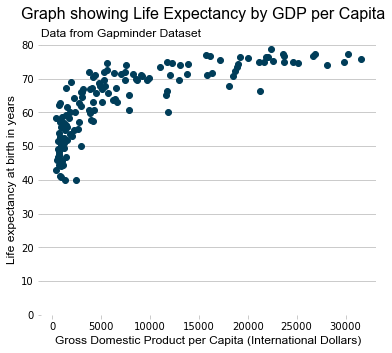

In [37]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
            color=(0, 0.239, 0.349))  # Colour specified using RGB Values

# Add Labels and titles
axes.set_xlabel("Gross Domestic Product per Capita (International Dollars)", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0)

# NEW - Set the Title (suptitle) and subtitle (title)
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745, 0.745, 0.745))
axes.yaxis.set_tick_params(color=(0.745, 0.745, 0.745))

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True);

[return to menu](#menu)

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

<a id = "footnotes"></a>
## 3.6. Footnotes and Captions

We can add footnotes and captions or annotations using the `figure.text()` method.
This takes the parameters:

* `x` and `y` to control the location of the text. This appears to be more an art than a science; you may need to experiment with the numbers to find a location you prefer.

* `s` for the string of text you wish to display

* `ha` for the horizontal alignment of the text, either centre, left or right.

It also takes the text parameters we’ve discussed previously.

You can have multiple of these objects on the figure, for example for annotating lines or points.

If annotating a point on a diagram using `axes.text()` can provide you with more accurate results!

The guidance does discourage annotations, unless necessary.


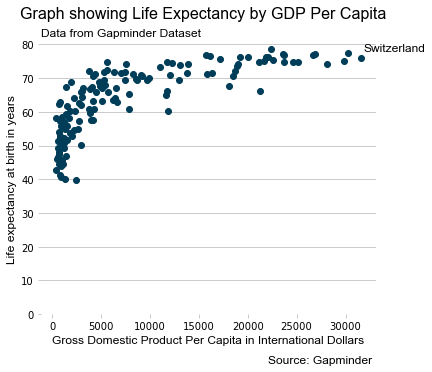

In [49]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize = (6,5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
             color=(0, 0.239, 0.349))  # Colour specified using RGB Values

# Add Labels and titles

axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.7451,0.7451,0.7451))
axes.yaxis.set_tick_params(color=(0.7451,0.7451,0.7451))

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0)

# Set the Title (suptitle) and subtitle (title)
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16)

plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")


# NEW - Set the caption
figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)


# NEW - Set an annotation
axes.text(x= 31871.53030, y = 78.03,  s="Switzerland", ha="left",
            fontname="Arial", size=12);

### Exercise 7:
Using the visualisation you created in the previous exercise:

Modify your plot to set a title; subtitle and a caption.

In [ ]:
# Exercise





In [ ]:
# Solution - These cells contain answers for the exercises.
#Run once to reveal the code.
#Run again to reveal the output. 

%load ../solutions/plotting_overview/exercise7.py

In Matplotlib `.annotate()` also exists – this can be useful as it also allows arrows to be drawn. However drawing arrows is not generally considered good practice.

In versions of Matplotlib < 3.3 the parameter for text is `s =`, from 3.3 this is `text =`.
For compatibility we’ve omitted the parameter, but we recommend using the parameter that’s appropriate for your version.

For more information on this method, including more customisation options there is a link to [the documentation]( https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html)

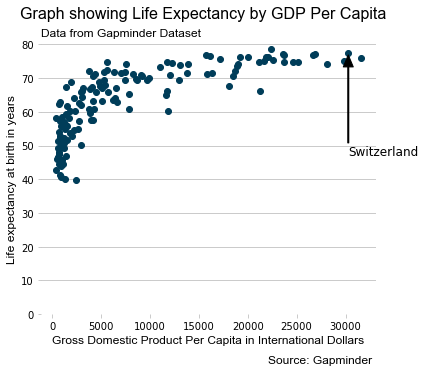

In [52]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize = (6,5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
             color=(0, 0.239, 0.349))  # Colour specified using RGB Values

# Add Labels and titles

axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.7451,0.7451,0.7451))
axes.yaxis.set_tick_params(color=(0.7451,0.7451,0.7451))

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0)

# Set the Title (suptitle) and subtitle (title)
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16)

plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")

# Set the caption
figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)

# NEW - Set an annotation
# Set coordinates (these could be set manually rather than programatically here)
swiss_gdp_x = val = gm_1987[gm_1987["country"] == "Switzerland"].values[0][5]  # GDP is our 5th col
swiss_le_y = val = (gm_1987[gm_1987["country"] == "Switzerland"].values[0][3] - 0.5) # Life Exp is our 3rd

axes.annotate("Switzerland",
              xy = (swiss_gdp_x, swiss_le_y),
              xytext= (0, -100),
              textcoords = "offset points",
              arrowprops=dict(headwidth=10, width=1, color="black"),
              fontsize=12);


We can add vertical or horizontal lines to our charts using ` plt.axvline()` or `plt.axhline()`

Here we’re using `plt.axvline()` to create a vertical line to show the mean GDP and `plt.ahline()` to show the mean life expectancy. 

Again, you often won’t find both on the same plot; this is for demonstration purposes.

I’ve used `axes.annotate()` to annotate each line. Alternatively you can provide a `label` argument to the `plt.ahline()` and display a legend.



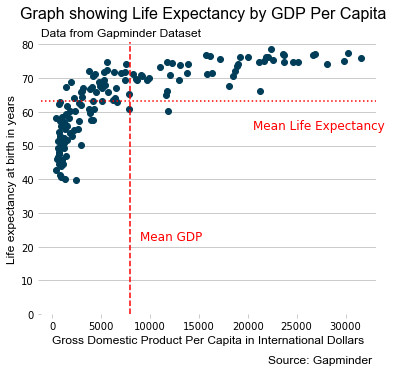

In [53]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize = (6,5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
             color=(0, 0.239, 0.349))  # Colour specified using RGB Values

# Add Labels and titles

axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.7451,0.7451,0.7451))
axes.yaxis.set_tick_params(color=(0.7451,0.7451,0.7451))

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0)

# Set the Title (suptitle) and subtitle (title)
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16)

plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")

# Set the caption
figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)

# Vertical line to show mean gdp
plt.axvline(x = (gm_1987["gdp_per_cap"].mean()),
            ymin = 0, 
            ymax = gm_1987["gdp_per_cap"].max(), 
            color = "red", linestyle = "dashed", 
            label = "mean")

# Create a horizontal line
plt.axhline(y = (gm_1987["life_exp"].mean()),
            xmin = 0, 
            xmax = gm_1987["life_exp"].max(), 
            color = "red", linestyle = "dotted")

# Annotate the V line
axes.annotate("Mean GDP",
              xy = ((gm_1987["gdp_per_cap"].mean()), 22),
              xytext= (10, 0),
              textcoords = "offset points",
              fontsize=12,
              color = "red")

# Annotate the H line
axes.annotate("Mean Life Expectancy",
              xy = ((gm_1987["life_exp"].mean()), 55),
              xytext= (200, 0),
              textcoords = "offset points",
              fontsize=12,
              color = "red");

[return to menu](#menu)

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

<a id = "legends"></a>
## 3.7. Legends

In the colour section we saw that we could use a different colour for each continent. We also used the code `plt.legend()` to display a legend detailing what each colour value represented.
We have some additional parameters we can specify.

* ** ` frameon` ** Takes either `True` or `False` and affects if the legend has a border box. Default is `True`.

* **` loc` ** Takes either a location code from 0 to 10 or a location string. Passing 2 or “upper left” will put the legend box in the upper left corner. 
Here I’ve gone for 'center right' just to demonstrate the difference – but I would argue the default is a good place for this visualisation.  We recommend using the strings, as they’re easier to understand for people who read your code.
Default behaviour is upper right.

* ** `ncol` ** Alters the number of columns; default is 1. I’ve set it to 2 to have a shorter, but wider legend.

* **` prop={"family": "Arial" , "size":12} `** Prop allows us to set the default font parameters for the Legend box. Here I’m choosing Arial and 12 to match with the other aspects of the visualisation.

* ** `title` ** Allows us to add a title for the legend.


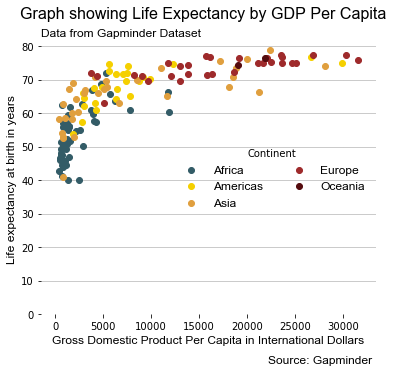

In [54]:
# NEW - Set Up
continents = gm_1987["continent"].unique().tolist() # Create a list with each unique value in continent column
continents.sort() # Sort this list in alphabetical order
my_palette = ["#335C67" ,"#F5D000", "#E09F3E", "#9E2A2B", "#540B0E"] # Create a list of colours I want

# zips together our continent names and pallete colours into one list of tuples
continent_palette = zip(continents, my_palette) 

# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# NEW - Loop through each continent and each colour in turn
for continent_name, colour in continent_palette:
    # Get only the data for the continent we are looking at
    continent_rows = gm_1987[gm_1987["continent"] == continent_name]
    
    axes.scatter(x=continent_rows["gdp_per_cap"], 
                 y=continent_rows["life_exp"],
                 c=colour, # Use corresponding colour from continent_palette
                 label=continent_name) # Gives each continent a label for our legend

# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0)

# NEW - Customise and show the Legend
plt.legend(frameon=False, # Turn off border around legend
           loc="center right", # Change location to center right
           ncol=2, # Change to 2 columns
           prop={"family": "Arial", "size":12},
           title = "Continent");



As we’ve said before it’s important to note that these changes will not work for all visualisations and are sometimes ** not ** good visualisations - but just demonstrations of what specific paramaters do.

In the visualisation above splitting the points into two columns may work if the location wasn’t changed – but it’s too close to the data points. Removing the frame around the legend also could lead viewers to believe the key is data points!

We can also add the parameters ` bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0 ` to move our legend outside of the axes.

For many ONS plots with a small amount of variables you’ll see the legend at the top of the chart; underneath the titles and subtitles. This is done in a similar manner; and in a later chapter there is an example of this.

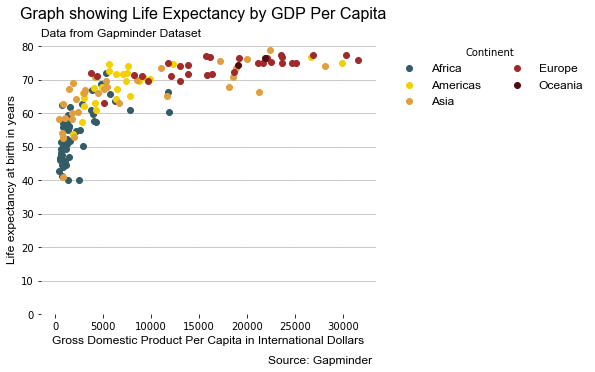

In [55]:
# Set Up
continents = gm_1987["continent"].unique().tolist() # Create a list with each unique value in continent column
continents.sort() # Sort this list in alphabetical order
my_palette = ["#335C67" ,"#F5D000", "#E09F3E", "#9E2A2B", "#540B0E"] # Create a list of colours I want

# zips together our continent names and pallete colours into one list of tuples
continent_palette = zip(continents, my_palette) 

# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Loop through each continent and each colour in turn
for continent_name, colour in continent_palette:
    # Get only the data for the continent we are looking at
    continent_rows = gm_1987[gm_1987["continent"] == continent_name]
    
    axes.scatter(x=continent_rows["gdp_per_cap"], 
                 y=continent_rows["life_exp"],
                 c=colour, # Use corresponding colour from continent_palette
                 label=continent_name) # Gives each continent a label for our legend

# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0)

# NEW - Customise and show the Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0,
           frameon=False, # Turn off border around legend
           ncol=2, # Change to 2 columns
           prop={"family": "Arial", "size":12},
           title = "Continent");

[return to menu](#menu)

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1"> 

<a id='global'></a>
# 4. Globally Setting Paramaters

### Globally setting fonts

We will often want to globally change the font for the whole notebook or script. 

We can set these using `rcParams`.

As we do with other global settings we should set these at the top of our workbook, when we load in our packages. This will ensure everything underneath uses the same global settings.

`rcParams["font.family"] = "sans-serif"`

This allows us to choose the font family we want to use. Following GSS Guidance, this is sans-serif.

`rcParams["font.sans-serif"] = ["Arial" , "Tahoma"]`

Here we are setting the specific fonts we wish to use in the order we wish to use them, in a list. If Arial is not avalible it will try to use Tahoma etc.

As these are fairly universal fonts, they should be available for most users. This is useful for creating reproducible code, ensuring the output looks the same regardless of who runs the code.


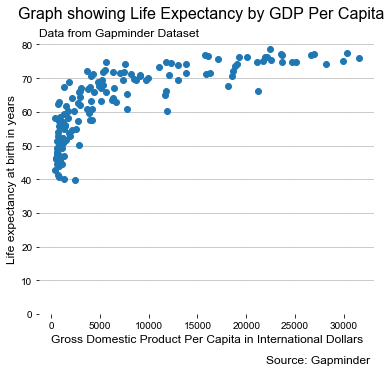

In [56]:
# NEW - import rcParams and set font settings
from matplotlib import rcParams

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Arial", "Tahoma"]

# Create a visualisation to demonstrate the font changes

# A visualisation here
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"])

# Add Labels and titles
# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0);

### Globally Setting Font Sizes

We can also set the font sizes from `matplotlib.rc` . We can fine tune these for the individual elements of our visualisation.

The minimum recommended font size recommended is 12.

In [57]:
# Set the default font sizes

import matplotlib

# setting variables for my sizes
# If I want to change a size, I only need to change it here

small_size = 12
medium_size = 14
bigger_size = 16

# Change the settings

matplotlib.rc("font", size=small_size)          # controls default text sizes
matplotlib.rc("axes", titlesize=small_size)     # fontsize of the axes title
matplotlib.rc("axes", labelsize=medium_size)    # fontsize of the x and y labels
matplotlib.rc("xtick", labelsize=small_size)    # fontsize of the tick labels
matplotlib.rc("ytick", labelsize=small_size)    # fontsize of the tick labels
matplotlib.rc("legend", fontsize=small_size)    # legend fontsize
matplotlib.rc("axes", titlesize=bigger_size)    # title fontsize

Again, this may seem like a lot of additional code, but remember we can set these once and they apply globally.

Let's create a basic visualisation again to see the effects. Notice we're now not specifying any font sizes or families in our `.set_title()`, `.set_xlabel` or `.set_ylabel()`.


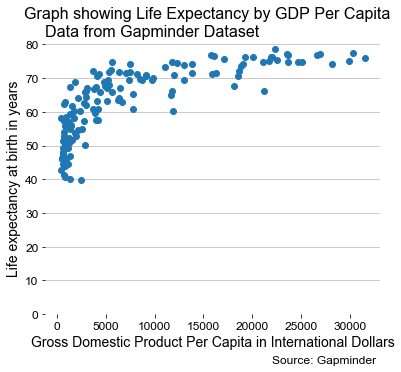

In [58]:
# A visualisation here to check it's worked.
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"])


# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16)
plt.title("Data from Gapminder Dataset" , loc="left")

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left")
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars")
axes.set_ylabel("Life expectancy at birth in years")

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0);

We can also set the global colour cycler if we want; here I’ve set it to the `Paired.colors` variant.

Generally the default value is okay; so future chapters will not be setting this globally.

In [59]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Paired.colors) 

### Global Settings In one cell.

As mentioned previously setting options globally can save a large amount of time. This is especially true if you’re creating multiple visualisations within a notebook or script.

In this section we’ll combine both setting the default fonts and setting the font sizes.

We won’t introduce anything new here – just streamline the code block we would use at the start of our notebook.

Note for completion I've loaded in Pandas here and also loaded in the data again.

In [60]:
# Load our packages 

import pandas as pd

# Import Matplotlib packages and functions:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set Default Fonts

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Arial", "Tahoma"]

# Set Default font sizes

small_size = 12
medium_size = 14
bigger_size = 16

# Change the font size for individual elements

matplotlib.rc("font", size=small_size)          # controls default text sizes
matplotlib.rc("axes", titlesize=small_size)     # fontsize of the axes title
matplotlib.rc("axes", labelsize=medium_size)    # fontsize of the x and y labels
matplotlib.rc("xtick", labelsize=small_size)    # fontsize of the tick labels
matplotlib.rc("ytick", labelsize=small_size)    # fontsize of the tick labels
matplotlib.rc("legend", fontsize=small_size)    # legend fontsize
matplotlib.rc("axes", titlesize=bigger_size)    # title fontsize

# Display visualisations below cells

% matplotlib inline

# Load in Data

gapminder = pd.read_csv("../data/gapminder.csv")

[return to menu](#menu)

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1"> 

<a id='saving'></a>
# 5. Saving Visualisations

To save a visualisation in Matplotlib you use the code:

In [61]:
figure.savefig("../outputs/my_vis.png")

Here:

`figure` refers to the last figure I’ve created.

`.savefig()` is our method.

The only argument here I’ve specified is the file path *and extension* of my new output.

My current working directory is `notebooks` so I need to go back up a level (`../`) to move into my outputs folder. Maintaining a separate outputs folder rather than just having generic “files” location helps to keep projects organised. You can read more about working directories and project structure in the Intro to Python course.

In [62]:
# Note by changing the file extension I'm now saving as a PDF.

figure.savefig("../outputs/my_vis.pdf")

Matplotlib can save as a variety of file formats:

* Image (Raster) Formats
    * .png - 'portable network graphics'
    * .jpg /.jpeg - 'joint photographic experts group'
    * .tif /.tiff - 'tagged image file format'
    
    
* Vector Formats
    * .ps /.eps - Postscript/ Encapsulated Postscript
    * .pdf - 'portable document format'
    * .svg - 'scalable vector graphics'


Why may we care about file types?
![image](../images/chapter_3_plotting_overview/vectorvsraster.jpg)
*Please note - any pixelisation in the vector image is the result of the compression when editing or in Jupyter Notebookse*

Raster images are images we're often most familiar with. These are made up of tiny squares; called pixels. Remembering back to the early days of digital cameras pictures often had that "squares" like quality. If we enlarge these images we can often find they look blurry; or pixilated. However they are often smaller file sizes than vector images.

Software for editing Raster images includes Microsoft Paint (a classic!), Adobe Photoshop and freeware options like Gimp and Paint.net.

Vector images are instead made up of paths. This gives them the ability to be scaled up or down at will without losing any quality – or appearing pixelated. Cliparts are a classic example of Vector images. A downside it that they’re often much larger file sizes and your audience may not be able to view the files if sent individually (rather than embedded in a Notebook or markdown document). Editing these is often more complicated; and requires special software. Note – We’ve included PDF files, as Matplotlib creates them as vectors; but not all generic PDF files are automatically vectors.

Software for editing Vector images includes Adobe Illustrator and freeware options like Inkscape.

We can set other arguments in the `.savefig()` method:

In [63]:
# Setting additonal parameters
figure.savefig("../outputs/my_vis.png", dpi=300, bbox_inches="tight")

Here I’m using the additional parameters:

* `dpi` to set the **d**ots **p**er **i**nch of the output. Most publications ask for a minimum of 300. This only applies to raster images (our .jpegs .pngs etc), but if we apply it to a vector image it will just be ignored.

* `bbox_inches` relates to the whitespace around a figure. Setting this to “tight” means we’ll have a minimal border around our figure.

There are other settings; but these ones should cover most of your needs.

### Exercise 8:
Using the visualisation you created in the previous exercise:

Save it in the outputs folder as a .jpeg file at 300 dpi, set the white space to “tight”.

Save it as a PDF file in the outputs folder, again setting the white space to “tight” and compare the two.

In [ ]:
# Exercise





In [ ]:
# Solution - These cells contain answers for the exercises.
#Run once to reveal the code.
#Run again to reveal the output. 

%load ../solutions/plotting_overview/exercise8.py

[return to menu](#menu)

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1"> 

<a id='other'></a>
# 6. Other Ways to Visualise

We’ve discussed plotting only in terms of Matplotlib in this chapter; this is because it forms the foundation of other packages (like Seaborn) and can really help to understand the structure of how data visualisation works.

Even if you exclusively use Seaborn in the future you may need to take elements from Matplotlib for fine tuning things like axes, or legends.

While most plots can be created in Matplotlib; sometimes the code needed to create them is much more complicated than other packages. This can be incredibly useful when we want very fine control, it can sometimes be too much if we have a simpler problem.

For example, our earlier visualisation for Life Expectancy by GDP Per Capita against infant mortality; coloured by continent took a lot of code, and a for loop to produce this output:

![Visualisation](../images/chapter_3_plotting_overview/life_exp.png)

Using Seaborn we can get that down, and no loops!

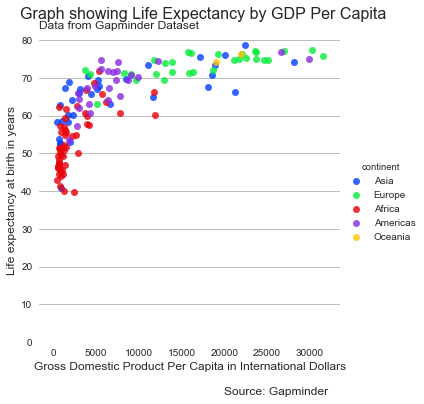

In [66]:
import seaborn as sns # We'd usually import this at the start
sns.set_style("whitegrid") # The style applies to all cells run after this - this one looks most similar to Matplotlib.

plot = sns.lmplot(x = "gdp_per_cap", y = "life_exp", data = gm_1987,
                  fit_reg = False,  # lmplot automatically fits a line of best fit; this removes it
                  hue = "continent", # We can colour by a column of data
                  palette = sns.color_palette("bright"))  # Set the colour pallete to match the Matplotlib one

plt.ylim(0, None) # Set our Y axis to start from 0 or it "floats"

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Return the axes object and set the gridlines with it
axes = plot.ax
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

# Add Labels, Title and Captions (this comes from Matplotlib!)
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16, y = 1.05)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left", y = 1.01)
plt.text(x=20000.0, y=-14, s="Source: Gapminder", ha="left",
         fontname="Arial", size=12)

# Note the methods are set_xlabels -with an s!
plot.set_xlabels("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
plot.set_ylabels("Life expectancy at birth in years", fontname="Arial", size=12);

As you can see Seaborn takes a different format than we’ve been using in matplotlib.

Here we’re using `sns.lmplot` to create our scatter plot. `sns.scatterplot` exists – but only from version 0.9.0 of Seaborn onwards.

The basic structure is:

* `x` - a string that is the name of the column we want for the X axis values

* `y` - a string that is the name of the column we want for the Y axis values

* `data` - the DataFrame we want to plot.

Note that we’re using the titles and labels from Matplotlib.

As we mentioned earlier Seaborn is built on TOP of Matplotlib. Rather than write it’s own versions of creating labels and titles Seaborn uses them from Matplotlib. This makes sense; as the methods in Matplotlib for this are robust, and it reduces the amount of code in the Seaborn package.


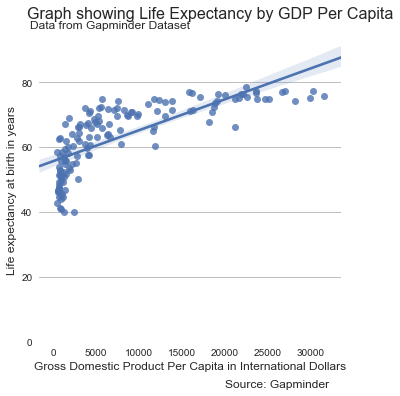

In [67]:
plot = sns.lmplot(x = "gdp_per_cap", y = "life_exp", data = gm_1987)

plt.ylim(0, None) # Set our Y axis to start from 0 or it "floats"

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Return the axes object and set the gridlines with it
axes = plot.ax
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

# Add Labels, Title and Captions (this comes from Matplotlib!)
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16, y = 1.05, x = 0.6)
plt.title("Data from Gapminder Dataset" ,    
          fontname="Arial", size=12, loc="left", y = 1.01, x = -0.03)

plt.text(x=20000.0, y=-14, s="Source: Gapminder", ha="left",
         fontname="Arial", size=12)

# Note the methods are set_xlabels -with an s!
plot.set_xlabels("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
plot.set_ylabels("Life expectancy at birth in years", fontname="Arial", size=12);

As mentioned in the comments this automatically applies a line of best fit. We can remove this with the parameter

```python
fit_reg = False
```

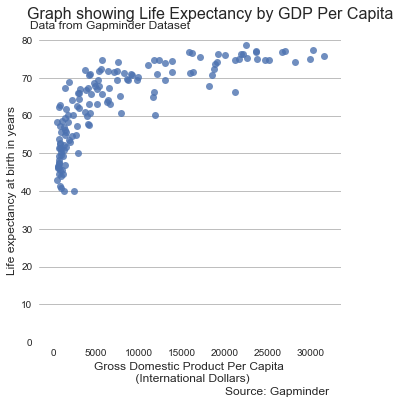

In [68]:
plot = sns.lmplot(x = "gdp_per_cap", y = "life_exp", data = gm_1987,
                  fit_reg = False)

plt.ylim(0, None) # Set our Y axis to start from 0 or it "floats"

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Return the axes object and set the gridlines with it
axes = plot.ax
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

# Add Labels, Title and Captions (this comes from Matplotlib!)
plt.suptitle("Graph showing Life Expectancy by GDP Per Capita", 
             fontname="Arial", size=16, y = 1.05, x = 0.6)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left", y = 1.01, x = -0.03)

plt.text(x=20000.0, y=-14, s="Source: Gapminder", ha="left",
         fontname="Arial", size=12)

# Note the methods are set_xlabels -with an s!
plot.set_xlabels("Gross Domestic Product Per Capita \n (International Dollars)", fontname="Arial", size=12)
plot.set_ylabels("Life expectancy at birth in years", fontname="Arial", size=12);

Colouring by continent is much easier – we can specify a column for the `hue` parameter.

`palette` controls the colour palette we’re applying. More information can be found in the [Seaborn colour palette documentation]( https://seaborn.pydata.org/tutorial/color_palettes.html)


Pandas also comes with it’s own inbuilt plotting system `.plot()`.

We can specify what kind of plot we want by using the `kind` parameter. 

The `title` parameter allows us to set the title; and our x and y labels are automatically created here.

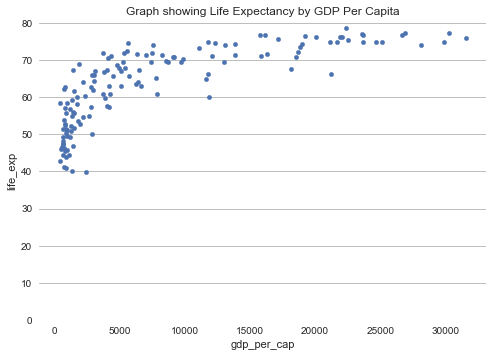

In [69]:
# Notice as well that Seaborn puts it's "style" on all charts after it's loaded in our version
# After version 8.0 it doesn't do this.

plot = gm_1987.plot(x = "gdp_per_cap", y = "life_exp",
                    kind = "scatter",
                    title = "Graph showing Life Expectancy by GDP per Capita",
                    ylim = 0)

# Return the axes object and set the gridlines with it
plot.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
plot.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
plot.set_frame_on(False);

We’ve just seen three different ways to produce similar plots.

None of them are “better” than other methods; but some are more succinct.

Some things are easier to implement in certain packages than others.

Using the Seaborn `.lmplot()` allowed us to colour by the `continent` column much more easily than the Matplotlib version. It’s also possible to do this in the Pandas `.plot()` version; but again much more of an involved process.

For the rest of this course we will use a variety of methods from Matplotlib, Seaborn and Pandas. We’ll switch between these methods, depending on what creates the “better” plot.


[return to menu](#menu)

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1"> 

<a id='multiple'></a>
# 7. Multiple Plots

<a id='multiple_mp'></a>
## 7.1 Matplotlib

Earlier we saw that we can loop through to plot multiple values. Another way of doing this is by adding more `axes.scatter()` layers.

I want to compare Africa and Europe.

Here I’ve filtered when setting my `x` and `y` co-ordinates – you may prefer to create a new DataFrame for each continent.


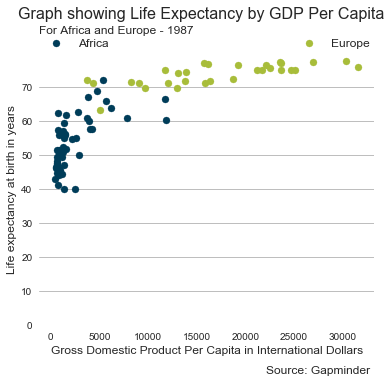

In [70]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data for Africa
axes.scatter(x = (gm_1987[(gm_1987["continent"] == "Africa")]["gdp_per_cap"]),
             y = (gm_1987[(gm_1987["continent"] == "Africa")]["life_exp"]),
             color = "#003D59",
             label = "Africa")

# Plot the Data for Europe
axes.scatter(x = (gm_1987[(gm_1987["continent"] == "Europe")]["gdp_per_cap"]),
             y = (gm_1987[(gm_1987["continent"] == "Europe")]["life_exp"]),
             color = "#A8BD3A",
             label = "Europe")


# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16, y = 1.01)
plt.title("For Africa and Europe - 1987" , 
          fontname="Arial", size=12, loc="left", y = 1.05)

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)

axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0)

# Customise and show the Legend
axes.legend(bbox_to_anchor=(0., 1.0, 1.0, .102), loc="lower left",
            ncol=2, mode="expand", borderaxespad=0,
            prop={"family": "Arial", "size":12});

<a id='multiple_seaborn'></a>
## 7.2 Seaborn
For Seaborn as we saw earlier we can set the “hue” parameter. Note here as I’ve had to create a pared down DataFrame with just the two continents I wish to see.

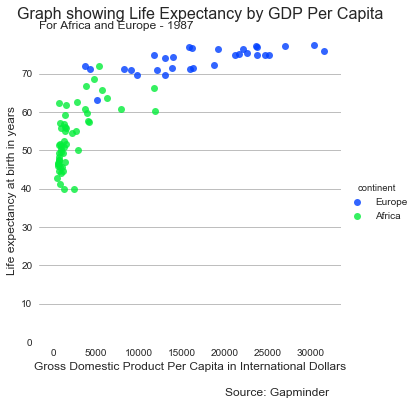

In [71]:
# Create a pared down DataFrame
gm_1987_africa_europe = gm_1987[(gm_1987["continent"] == "Africa") | (gm_1987["continent"] == "Europe") ]

# Create the Plot
plot = sns.lmplot(x = "gdp_per_cap", y = "life_exp", data = gm_1987_africa_europe,
                  fit_reg = False,  # lmplot automatically fits a line of best fit; this removes it
                  hue = "continent", # We can colour by a column of data
                  palette = sns.color_palette("bright"))  # Set the colour pallete to match the Matplotlib one

plt.ylim(0, None) # Set our Y axis to start from 0 or it "floats"

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Return the axes object and set the gridlines with it
axes = plot.ax
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

# Add Labels, Title and Captions (this comes from Matplotlib!)
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16, y = 1.05)
plt.title("For Africa and Europe - 1987" , 
          fontname="Arial", size=12, loc="left", y = 1.01)

plt.text(x= 20000.0, y=-14, s="Source: Gapminder", ha="left",
         fontname="Arial", size=12)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12);

<a id='multiple_ax_mp'></a>
## 7.3 Multiple Axes - Matplotlib

For simple cases in Matplotlib multiple axes can be set when the figure is created.
Here two axes objects are created - `axes1` and `axes2`. In `plt.subplots()` how they should be arranged can be specified; here as 2 columns so side by side.

When we plot to each axes we use it’s name – e.g `axes1.scatter()`. Here the name of each axes has been plotted using the `.text()` method to illustrate this. There will later be an example with data.

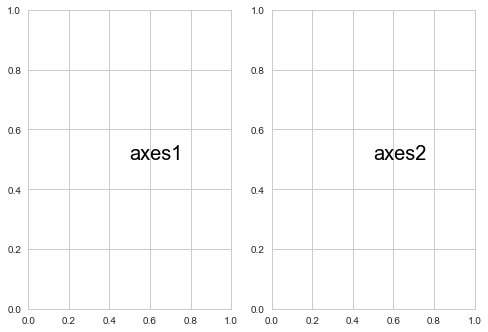

In [72]:
# Create 1 figure, 2 axes and have them side by side
figure, (axes1, axes2) = plt.subplots(ncols = 2)

axes1.text(x = 0.5, y = 0.5, s ="axes1", fontname="Arial", size=20, color = "black")

axes2.text(x = 0.5, y = 0.5, s ="axes2", fontname="Arial", size=20, color = "black");

And here 4 axes objects are created. This time to have 2 columns and 2 rows the axes need to be specified by a list, itself containing a list of the axes objects I want in each row.

Again, the text is shown for each axes so you can see how matplotlib allocated the contents of that list.

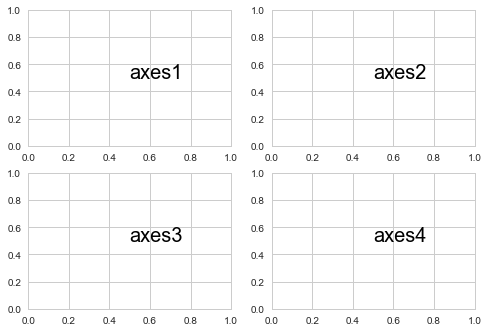

In [73]:
# Create 1 figure, 4 axes and have them in 2 columns and 2 rows

figure, ([[axes1, axes2], [axes3, axes4]]) = plt.subplots(ncols = 2, nrows= 2)

axes1.text(x = 0.5, y = 0.5, s ="axes1", fontname="Arial", size=20, color = "black")

axes2.text(x = 0.5, y = 0.5, s ="axes2", fontname="Arial", size=20, color = "black")

axes3.text(x = 0.5, y = 0.5, s ="axes3", fontname="Arial", size=20, color = "black")

axes4.text(x = 0.5, y = 0.5, s ="axes4", fontname="Arial", size=20, color = "black");

Finally a full example of how this can be applied to our Africa and Europe Data from 1987

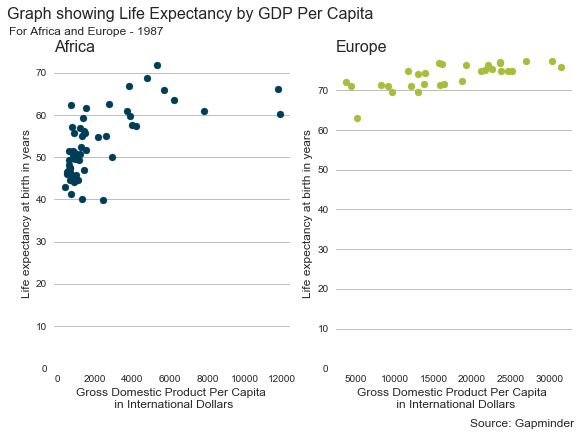

In [74]:
# Set up the figure and two axes
figure, (axes1, axes2) = plt.subplots(ncols = 2)

######################################################
# Plot Axes 1
axes1.scatter(x = (gm_1987[(gm_1987["continent"] == "Africa")]["gdp_per_cap"]),
            y = (gm_1987[(gm_1987["continent"] == "Africa")]["life_exp"]),
            color = "#003D59")

axes1.set_title("Africa", 
               fontname="Arial", size=16, loc = "left")
axes1.set_xlabel("Gross Domestic Product per Capita \n in International Dollars", fontname="Arial", size=12)
axes1.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12) 


# Set Gridlines and colours
axes1.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes1.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes1.set_frame_on(False)
axes1.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes1.set_ylim(bottom=0)

######################################################
# Plot Axes 2
axes2.scatter(x = (gm_1987[(gm_1987["continent"] == "Europe")]["gdp_per_cap"]),
            y = (gm_1987[(gm_1987["continent"] == "Europe")]["life_exp"]),
            color = "#A8BD3A",
            label = "Europe")


axes2.set_title("Europe", 
               fontname="Arial", size=16, loc = "left")
axes2.set_xlabel("Gross Domestic Product per Capita \n in International Dollars", fontname="Arial", size=12)
axes2.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Gridlines and colours
axes2.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes2.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes2.set_frame_on(False)
axes2.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes2.set_ylim(bottom=0)

######################################################
# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16, y = 1.05, x = 0.315)

figure.text(x= 0, y= 0.98, s="For Africa and Europe - 1987", ha="left",
            fontname="Arial", size=12)

figure.text(x=0.80, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)

figure.tight_layout();    

<a id='multiple_ax_mp_programatically'></a>
## 7.4 Multiple Axes Programmatically – Matplotlib.

This can also do this programmatically with a loop in Matplotlib.

I’ve manually set the number of columns I wanted (2) and used the math.ceil() function to find the right number of rows. I could set this manually here as there’s only 5 individual graphs but I’m showing it as an option. `.round()` always rounds down, so we need `maths.ceil()` to round up.

This time we’re including another argument in our `zip()` function – `axes.flatten()` which allows us to loop through each axes in turn.

This is again referenced in our for loop – where we loop through each thing in our `continent_palette` in turn.

When we plot now we’re using the placeholder `each_ax` for each of our axes in turn. Note that I’m also setting the x and y lims to be the same for each plot. Without this we loose the sense of scale between the different continents.

We can’t set an uneven number of axes – in this example we have to plot 6 sets of axis; even though we only have 5 plots we wish to make. We can remove the blank plots with `figure.delaxes(axes[2][1])` - this is in the order of columns and then rows; and starts counting at 0.


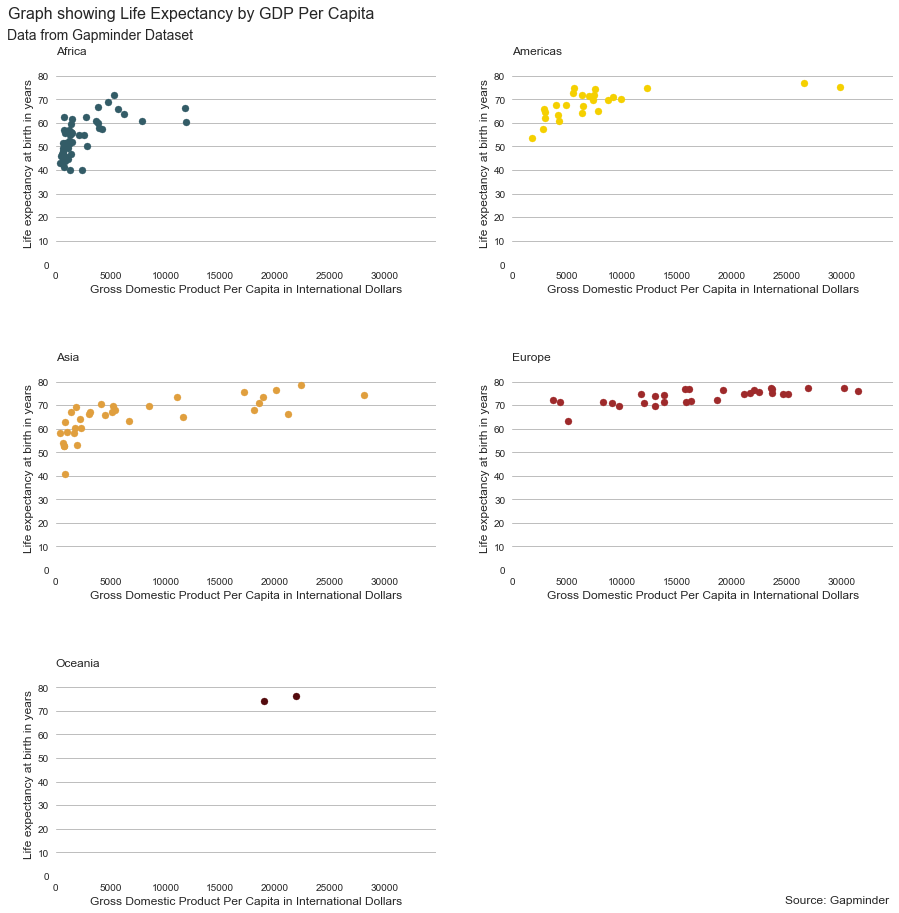

In [75]:
# Import the math module so we can get the .ceil for rounding
import math

# Set Up
continents = gm_1987["continent"].unique().tolist() # Create a list with each unique value in continent column
continents.sort() # Sort this list in alphabetical order
my_palette = ["#335C67" ,"#F5D000", "#E09F3E", "#9E2A2B", "#540B0E"] # Create a list of colours I want

# NEW - Create our figure and our axes
figure, axes = plt.subplots(nrows=(math.ceil(len(continents)/2)), ncols=2, figsize=(15, 15))
figure.subplots_adjust(hspace=0.5)

# zips together our axes, continent names and pallete colours into one list of tuples
continent_palette = zip(axes.flatten(), continents, my_palette) 

# Loop through each continent and each colour in turn
for each_ax, continent_name, colour in continent_palette:
    # Get only the data for the continent we are looking at
    continent_rows = gm_1987[gm_1987["continent"] == continent_name]

    each_ax.scatter(x=continent_rows["gdp_per_cap"], 
                 y=continent_rows["life_exp"],
                 c=colour )# Use corresponding colour from continent_palette
    
    each_ax.set_title( label = continent_name, loc = "left")
    each_ax.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
    each_ax.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)
    each_ax.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
    each_ax.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
    each_ax.set_frame_on(False)
    each_ax.set_axisbelow(True)
    
    # Set the x and y lims to be the same for each vis - or we loose scale.
    each_ax.set_xlim(left = 0, right = ( gm_1987["gdp_per_cap"].max() + (gm_1987["gdp_per_cap"].max() / 10) ) )
    each_ax.set_ylim(bottom=0, top = ( gm_1987["life_exp"].max() + (gm_1987["life_exp"].max() / 10) ))



# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16, y = 0.93, x = 0.25)
figure.text(x=0.08, y= 0.9, s="Data from Gapminder Dataset", ha="left",
            fontname="Arial", size=14)
figure.text(x=0.8, y= 0.1, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)

# Remove the empty plot at the bottom right
figure.delaxes(axes[2][1]); # Cols and Rows - starts at 0

<a id='multiple_ax_seaborn'></a>

## 7.5 Multiple Axes – Seaborn.

We can do a similar effect in Seaborn. If you’re using a more modern version the `sns.scatterplot()` method has the ability to plot to axes – so can be created similarly to the matplotlib version with finer control.

Here we set the `col` parameter to continent, which automatically splits our data into different visualisations.

To show the X and Y axis on each plot we have to explicitly set `sharex` and `sharey` to `False`. 

To set the titles for each visualisation we have to first set the titles to be blank. If you comment out that line (11) it shows both our modified column names from the line below and the standard ones that Seaborn generates. It should also be noted the  `”{col_name”}”` in set_titles is generic; and should be used exactly in that way to work. These methods are chained after the creation of our dataset.

We’ve also need to assign the DataFrame here to a variable. We can then access the `.axes` objects from them (line 22) and loop over them to set the labels, limits, grids and tick colours.

`plot.fig.subplots_adjust` allows us to adjust the white space between each figure. Especially important as our y axis label here is quite long!

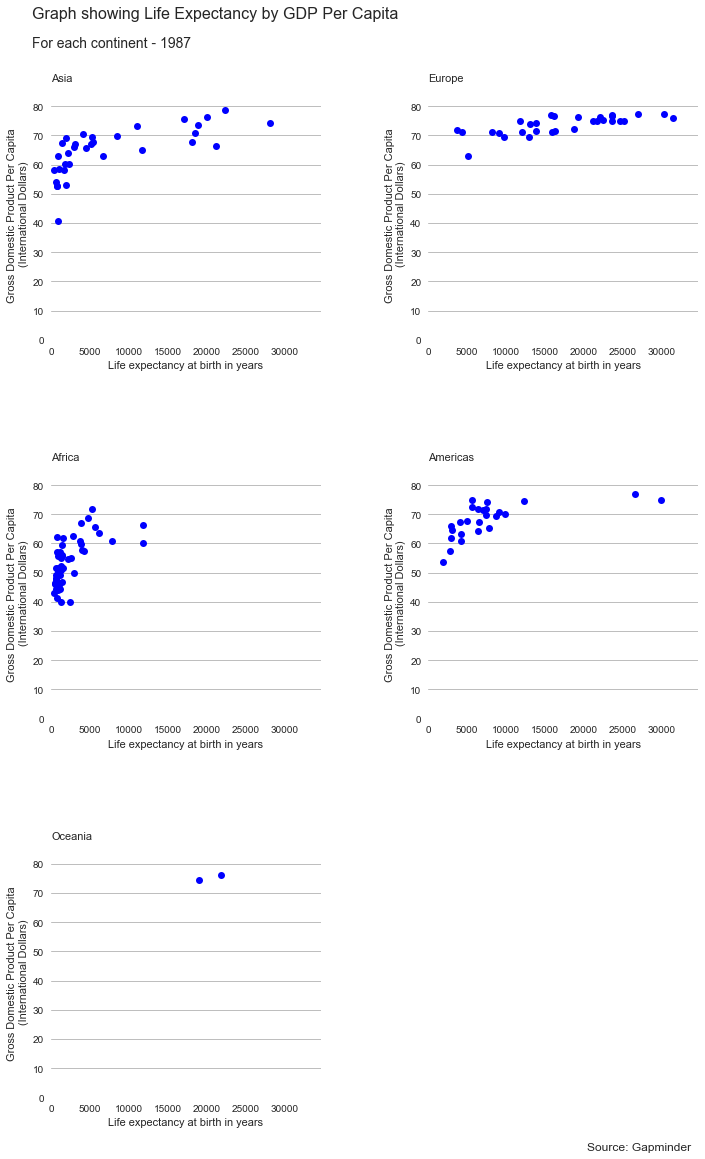

In [76]:
# Create the Plot
plot = (sns.lmplot(x = "gdp_per_cap", y = "life_exp", data = gm_1987,
                   fit_reg = False,  # lmplot automatically fits a line of best fit; this removes it
                   col = "continent", # Create a new chart for each continent
                   col_wrap = 2, # 2 charts per row
                   sharex = False, # Without these two lines we don't visible axis on all charts
                   sharey = False,
                   scatter_kws={"color": "blue", "alpha":1}) # Set the colours of the points and the alpha.
        .set_titles("")  # Without this we also end up with a central title!
        .set_titles("{col_name}", loc = "left" ) ) # Without this the titles are "continent = Asia" etc
 
# Set global title, subtitle and caption.
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16, y = 1.05, x = 0.31)
plt.text(x = -2500, y = 360, s = "For each continent - 1987", fontname="Arial", size=14) 

# When I use "title" here it removes the "Oceania" label
plt.text(x= 69000.0, y=-18, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
 
# Get each axes object in the plot
axes = plot.axes
 
# Loop over them to set x label, y label, x and y limits, gridlines and tick colours.
for ax in axes:
    ax.set_xlabel("Life expectancy at birth in years")
    ax.set_ylabel("Gross Domestic Product per Capita \n (International Dollars) ")
    ax.set(xlim=(0, (gm_1987["gdp_per_cap"].max() + (gm_1987["gdp_per_cap"].max()/10) )), # Sets xlim
            ylim=(0, (gm_1987["life_exp"].max() + (gm_1987["life_exp"].max()/10))))
    ax.grid(b = True , which = "both", color = (0.745, 0.745, 0.745))
    ax.xaxis.set_tick_params(color=(0.7451,0.7451,0.7451))
    ax.yaxis.set_tick_params(color=(0.7451,0.7451,0.7451))

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)
 
# Adjust the white space between each figure
plot.fig.subplots_adjust(wspace= 0.4, hspace = 0.5)

# Set gridlines
for index, each_ax in enumerate(plot.axes.flatten()): 
    each_ax.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
    each_ax.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745));

# End of Chapter

You have completed chapter 2 of the Data Visualisation course. Please move on to chapter 3.

[return to menu](#menu)